<style>
h1 {
  color: #0078d4
}
</style>
<h1>Text Mining & NLP
</h1>

<p>
    Sentiment analysis is a fundamental application of text mining and natural language processing (NLP) that involves determining whether a given piece of text conveys a positive, negative, or neutral sentiment. Various techniques can be applied to perform sentiment analysis. This assignment, will have a focus on approaches using TF-IDF, Bag of Words (BOW), and word embeddings.
</p>
<p>
    I will be using the <strong>sentiment140 (training)</strong> dataset. It contains 1,600,000 tweets extracted using the Twitter API. The tweets have been annotated (<strong>0 = negative, 4 = positive</strong>), and they can be used to detect sentiment. Sentiment140 contains the following 6 fields:
</p>
<ol>
    <li><strong>target:</strong> the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)</li>
    <li><strong>ids:</strong> The id of the tweet (2087)</li>
    <li><strong>date:</strong> the date of the tweet (Sat May 16 23:58:44 UTC 2009)</li>
    <li><strong>flag:</strong> The query (lyx). If there is no query, then this value is NO_QUERY.</li>
    <li><strong>user:</strong> the user that tweeted (robotickilldozr)</li>
    <li><strong>text:</strong> the text of the tweet (Lyx is cool)</li>
</ol>

Questions:
1. Explore and prepare the data (Tokenization, Stemming, Stopwords, visualization, etc.)
2. Build a BOW and train a KNN, Decision Tree, and SVM model
3. Evaluate the above models (confusion matrix, accuracy, classification report, etc.)
4. Select one of the word embedding methods (Word2Vec, GloVe, or FastText), build a
CNN model, and compare its results with those obtained in Question 2.
5. Build an API or a user interface to use the trained CNN model in production (this
question is optional)

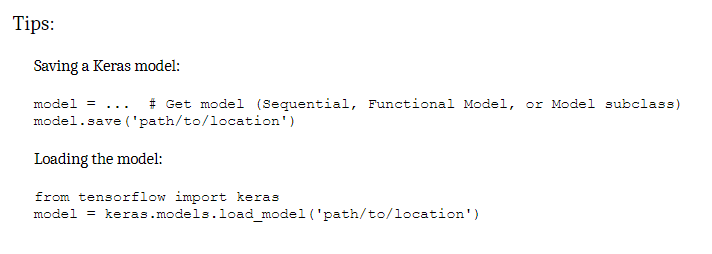

<style>
    h3 {
        color: #0078d4
    }
</style>
<h3>1. Explore and prepare the data (Tokenization, Stemming, Stopwords, visualization, etc.)</h3>

As I noticed that test data is very small in comparison to the train data, I decided to merge those 2 files. At some later stage, I will split them in the rate that is better.

In [113]:
import pandas as pd

#adding column names that will be saved as column names for the df
column_names=['Target', 'Ids', 'Date', 'Flag', 'User', 'Text']

#leading files
train_data = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', names=column_names, header=None)
df = train_data.sample(n=50000, random_state=42)


In [114]:
df.head()

,Target,Ids,Date,Flag,User,Text
541200,0,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,0,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo..."
766711,0,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...
285055,0,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...
705995,0,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem


In [115]:
print(df.shape)

(50000, 6)


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 541200 to 172400
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  50000 non-null  int64 
 1   Ids     50000 non-null  int64 
 2   Date    50000 non-null  object
 3   Flag    50000 non-null  object
 4   User    50000 non-null  object
 5   Text    50000 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.7+ MB


In [117]:
#those colors will be used to display plots
colors = ["#19647E", "#FF6F61", '#B7C3F3', '#DD7596', '#8EB897', '#F9CDAD', '#F8AFA8', '#A8D0E6', '#8A5575', '#D8B56B']

<style>
    h4 {
        color: #d4007c
    }
</style>
<h4>Data preparation</h4>

In [118]:
#decapitating all the letters in text column
df['Text'] = df['Text'].str.lower()

In [119]:
#removing ' so that words like don't become dont .....
df['Text'] = df['Text'].str.replace("[']", '', regex=True)
#replacing all the characters that are not numbers or alphabetic letters or characters  / -  wih empty space
df['Text'] = df['Text'].str.replace("[^a-zA-Z0-9/-]", ' ', regex=True)
#removing 2 or more empty spaces
df['Text'] = df['Text'].str.replace(r'\s+', ' ', regex=True)

<style>
    h4 {
        color: #d4007c
    }
</style>
<h4>Tokenization</h4>

In [120]:
#%pip install nltk
from nltk.tokenize import word_tokenize
# nltk.download('punkt')
# nltk.download('punkt_tab')

In [121]:
#adding new column tha will contain an array of tokens (words) from the column text
df['tokenized'] = df['Text'].apply(word_tokenize)

In [122]:
#removing stopwords like is, and, or....
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['tokenized'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop_words])

<style>
    h4 {
        color: #d4007c
    }
</style>
<h4>Stemming</h4>

Stemming aims to bring words to their original base, by removing suffixes or prefixes.<br>
For example, running will result to run

In [123]:
from nltk.stem import PorterStemmer

#using PorterStemmer to stem words
stemmer = PorterStemmer()
df['tokenized'] = df['tokenized'].apply(lambda x: [stemmer.stem(word) for word in x])

In [124]:
df.head(20)

,Target,Ids,Date,Flag,User,Text,tokenized
541200,0,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,chrishasboobs ahhh i hope your ok,"[chrishasboob, ahhh, hope, ok]"
750,0,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,misstoriblack cool i have no tweet apps for m...,"[misstoriblack, cool, tweet, app, razr, 2]"
766711,0,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,tiannachaos i know just family drama its lame...,"[tiannachao, know, famili, drama, lame, hey, n..."
285055,0,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,school email wont open and i have geography st...,"[school, email, wont, open, geographi, stuff, ..."
705995,0,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,"[upper, airway, problem]"
379611,0,2052380495,Sat Jun 06 00:32:16 PDT 2009,NO_QUERY,Yengching,going to miss pastors sermon on faith,"[go, miss, pastor, sermon, faith]"
1189018,4,1983449090,Sun May 31 13:10:36 PDT 2009,NO_QUERY,jessig06,on lunch dj should come eat with me,"[lunch, dj, come, eat]"
667030,0,2245479748,Fri Jun 19 16:11:29 PDT 2009,NO_QUERY,felicityfuller,piginthepoke oh why are you feeling like that,"[piginthepok, oh, feel, like]"
93541,0,1770705699,Mon May 11 22:01:32 PDT 2009,NO_QUERY,stephiiheyy,gahh noo peyton needs to live this is horrible,"[gahh, noo, peyton, need, live, horribl]"
1097326,4,1970386589,Sat May 30 03:39:34 PDT 2009,NO_QUERY,wyndwitch,mrstessyman thank you glad you like it there ...,"[mrstessyman, thank, glad, like, product, revi..."


<b>Visualization</b>

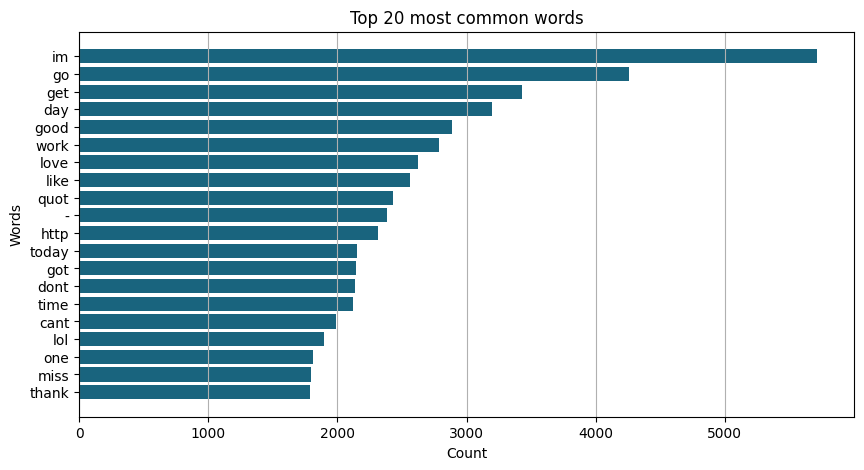

In [148]:
from matplotlib import pyplot as plt
from collections import Counter

#geting all the tokens in one list
all_tokens = [word for tokens in df['tokenized'] for word in tokens]
#counting number of each word, it is saved as a dictionary
word_counts = Counter(all_tokens)
#getting top 20 most common words
common_words = word_counts.most_common(20)
#separating words and counts
words, counts = zip(*common_words)

#plotting results
plt.figure(figsize=(10, 5))
plt.barh(words, counts, color= colors[0])
plt.xlabel('Count')
plt.ylabel('Words')
plt.title('Top 20 most common words')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()


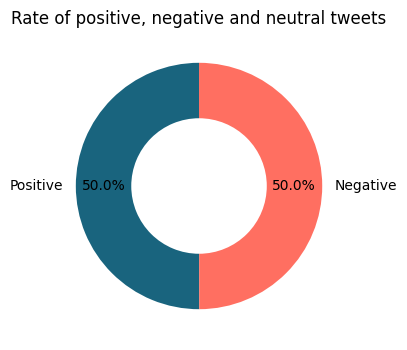

In [126]:
dict_targetValues={0:'Negative', 4:'Positive', 2:'Neutral'}
labels = [dict_targetValues[key] for key in df['Target'].value_counts().index]

plt.figure(figsize=(7, 4))
plt.pie(df['Target'].value_counts(), labels=labels, autopct='%1.1f%%', colors=colors, startangle=90,  wedgeprops=dict(width=0.45), pctdistance=0.77)
plt.title('Rate of positive, negative and neutral tweets')
plt.show()

<style>
    h3 {
        color: #0078d4
    }
</style>
<h3>2. Build a BOW and train a KNN, Decision Tree, and SVM model</h3>

<style>
    h4 {
        color: #d4007c
    }
</style>
<h4>Bag of Words (BoW)- transforming text into numbers</h4>

In [127]:
from sklearn.feature_extraction.text import CountVectorizer

#initializing a vectorizer that will convert words into numbers
vectorizer = CountVectorizer()

#splitting data into input and output, input is tweet and output is if tweet is positive or negative; x will be vectorized only
x= vectorizer.fit_transform(df['Text'])
y= df['Target']

<b>Splitting data into test/ train data</b>

In [128]:
from sklearn.model_selection import train_test_split

#splitting data into test 20% and train 80%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<style>
    h4 {
        color: #d4007c
    }
</style>
<h4>Building models</h4>

<style>
    h4 {
        color:rgb(0, 212, 184)
    }
</style>
<h4>Model 1: K-Nearest Neighbors (KNN)</h4>

In [143]:
#using greed search to get the best value for n_neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#initializing KNeighborsClassifier
knn = KNeighborsClassifier()

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

Making predictions for test data

In [144]:
#making predictions
y_pred_knn = knn.predict(x_test)

Accuracy

In [145]:
from sklearn.metrics import accuracy_score

accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn_percentage = accuracy_knn * 100
print(f"Accuracy KNN: {accuracy_knn_percentage:.2f}%")


Accuracy KNN: 65.67%


Confusion matrix

In [146]:
#showing confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion matrix:")
print(conf_matrix_knn)

Confusion matrix:
[[3250 1727]
 [1706 3317]]


Classification report

In [147]:
from sklearn.metrics import classification_report
class_report_knn = classification_report(y_test, y_pred_knn)
print(class_report_knn)

              precision    recall  f1-score   support

           0       0.66      0.65      0.65      4977
           4       0.66      0.66      0.66      5023

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



<style>
    h4 {
        color:rgb(0, 212, 184)
    }
</style>
<h4>Method 2: Decision tree</h4>

In [149]:
from sklearn.tree import DecisionTreeClassifier

#initilizing the model
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

#making predictions
y_pred_dt = tree.predict(x_test)

Accuracy

In [150]:
#accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt_percentage = accuracy_dt * 100
print(f"Accuracy dt.: {accuracy_dt_percentage:.2f}%")

Accuracy dt.: 69.27%


Confusion matrix

In [151]:
#showing confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion matrix:")
print(conf_matrix_dt)

Confusion matrix:
[[3446 1531]
 [1542 3481]]


Classification report

In [152]:
class_report_dt = classification_report(y_test, y_pred_dt)
print(class_report_dt)

              precision    recall  f1-score   support

           0       0.69      0.69      0.69      4977
           4       0.69      0.69      0.69      5023

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



<style>
    h4 {
        color:rgb(0, 212, 184)
    }
</style>
<h4>Model 3: Support Vector Machine- SVM</h4>

In [153]:
from sklearn.svm import SVC

#initilizing the mddeel
svc = SVC()
svc.fit(x_train, y_train)

#making predictions
y_pred_svm = svc.predict(x_test)


Accuracy

In [154]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_svm_percentage = accuracy_svm * 100
print(f"Accuracy svc: {accuracy_svm_percentage:.2f}%")

Accuracy svc: 77.51%


Confusion matrix

In [155]:
#showing confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion matrix:")
print(conf_matrix_svm)

Confusion matrix:
[[3803 1174]
 [1075 3948]]


Classification report

In [156]:
class_report_svm = classification_report(y_test, y_pred_svm)
print(class_report_svm)

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      4977
           4       0.77      0.79      0.78      5023

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



<style>
    h3 {
        color: #0078d4
    }
</style>
<h3>3. Evaluate the above models (confusion matrix, accuracy, classification report, etc.)</h3>

In [159]:
evaluation_metrics = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree', 'SVM'],
    'Accuracy': [accuracy_knn, accuracy_dt, accuracy_svm],
    'Accuracy in %': [accuracy_knn_percentage, accuracy_dt_percentage, accuracy_svm_percentage] 
})

evaluation_metrics.head()

,Model,Accuracy,Accuracy in %
0,KNN,0.6567,65.67
1,Decision Tree,0.6927,69.27
2,SVM,0.7751,77.51


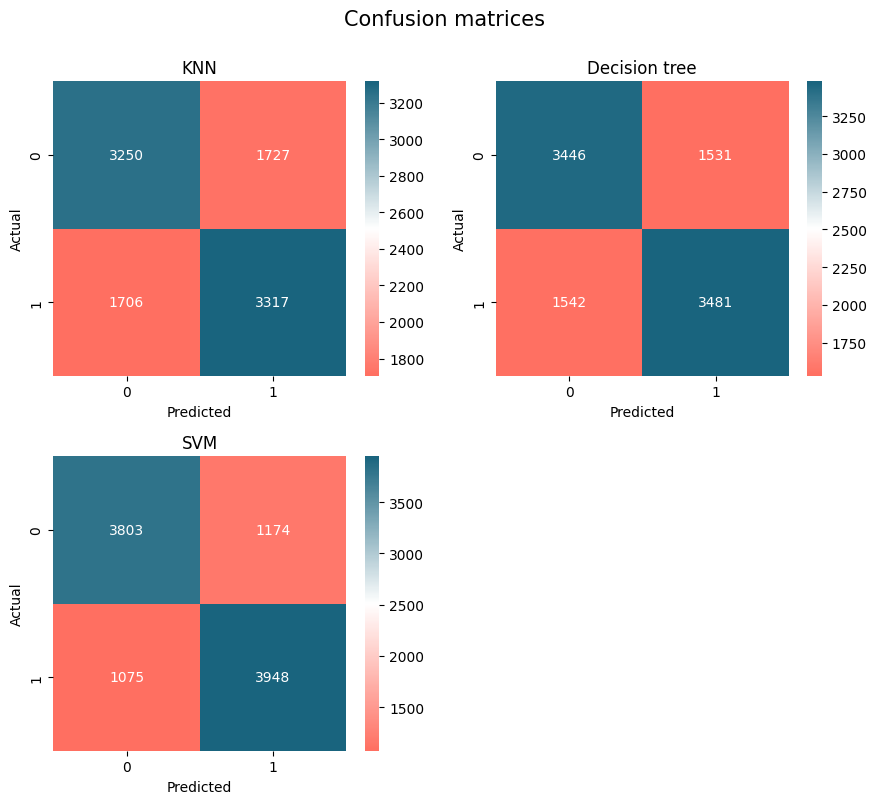

In [163]:
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
 #colors that i will be using
my_colors = ['#FF6F61', '#FFFFFF', '#19647E']
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", my_colors)

#adding confusion matrices to the array and their names
conf_matrices = [conf_matrix_knn, conf_matrix_dt, conf_matrix_svm]
titles = ['KNN', 'Decision tree', 'SVM']

fig, axes = plt.subplots(2, 2, figsize=(9, 8))

#looping and showing data
for i, ax in enumerate(axes.ravel()):
    #in order to avoid error as there are only 3 models but 4 places
    if i < len(conf_matrices):
        sns.heatmap(conf_matrices[i], annot=True, fmt='d', cmap=custom_cmap, ax=ax)
        ax.set_title(titles[i])
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")
    else:
        fig.delaxes(ax)  #removing empty plot

plt.suptitle("Confusion matrices", fontsize=15, y=1.0)
plt.subplots_adjust(hspace=0.3, wspace=0.6) #adjusting space between plots
plt.tight_layout()
plt.show()

<b>OBS. Detailed classification report if located under each clustering methods!</b>